In [137]:
%reload_kedro
X_train =  io.load('non_stand_X_train')
X_test =  io.load('non_stand_X_test')
X_valid =  io.load('non_stand_X_valid')

2019-07-01 14:50:28,465 - INFO - ** Kedro project Twitter Network
2019-07-01 14:50:28,477 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/logging.yml
2019-07-01 14:50:28,506 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/catalog.yml
2019-07-01 14:50:28,542 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/credentials.yml
2019-07-01 14:50:28,546 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/parameters.yml
2019-07-01 14:50:28,561 - INFO - Defined global variables proj_dir, proj_name, conf and io
2019-07-01 14:50:28,563 - INFO - Loading data from `non_stand_X_train` (PickleLocalDataSet)...
2019-07-01 14:50:28,575 - INFO - Loading data from `non_stand_X_t

In [138]:
edges_train = io.load('edges_train')

2019-07-01 14:50:30,114 - INFO - Loading data from `edges_train` (PickleLocalDataSet)...


In [48]:
DiG = io.load('DiG_train')

2019-07-01 10:55:48,206 - INFO - Loading data from `DiG_train` (PickleLocalDataSet)...


In [54]:
from networkx.algorithms.reciprocity import reciprocity
reciprocity(DiG, ['4764717'])['4764717']

0.0

In [126]:
y_train = io.load('y_train')

2019-07-01 13:46:52,410 - INFO - Loading data from `y_train` (PickleLocalDataSet)...


In [132]:
X_train["log_source_in"] = np.log(X_train.source_in)
X_train["log_sink_in"] = np.log(X_train.sink_in)

In [136]:
X_test.link_efficiency.describe()

count    2000.000000
mean        0.470000
std         0.174674
min         0.250000
25%         0.333333
50%         0.500000
75%         0.500000
max         1.000000
Name: link_efficiency, dtype: float64

In [157]:

df

,source_in_degree,source_out_degree,source_bi_degree,source_nbrs,sink_in_degree,sink_out_degree,sink_bi_degree,sink_nbrs,JC_followees,JC_followers,...,source_avg_nbr_degree,sink_avg_nbr_degree,link_dispersion,source_clustering,sink_clustering,link_efficiency,follow_back,source_reciprocity,sink_reciprocity,label
0,82,784,52,814,5,0,0,5,0.000000,0.000000,...,235.658163,0.000000,0.000000,0.015553,0.050000,0.333333,0,0.120092,0.000000,1
1,19,139,11,147,463,0,0,463,0.000000,0.004167,...,8186.014388,0.000000,0.000000,0.019045,0.256692,0.500000,0,0.139241,0.000000,0
2,36,492,36,492,3,0,0,3,0.000000,0.054054,...,4101.046748,0.000000,0.000000,0.035721,1.000000,0.500000,0,0.136364,0.000000,1
3,29,1135,23,1141,1,0,0,1,0.000000,0.000000,...,882.252863,0.000000,0.000000,0.006016,0.000000,0.000000,0,0.039519,0.000000,1
4,33,2215,19,2229,20,0,0,20,0.000000,0.000000,...,974.492099,0.000000,0.000000,0.001331,0.107895,0.333333,0,0.016904,0.000000,1
5,4,35,3,36,25,0,0,25,0.000000,0.035714,...,114.514286,0.000000,0.000000,0.116531,0.115000,0.500000,0,0.153846,0.000000,0
6,28,206,18,216,431,7,7,434,0.009479,0.002183,...,5939.626214,12454.857143,0.000000,0.021951,0.049703,0.500000,0,0.153846,0.018265,1
7,36,216,17,235,376,0,0,376,0.000000,0.009804,...,376.319444,0.000000,0.000000,0.012829,0.052567,0.500000,0,0.134921,0.000000,0
8,411,382,184,609,15,0,0,15,0.000000,0.002353,...,2598.903141,0.000000,0.000000,0.150600,0.271429,0.500000,0,0.464061,0.000000,0
9,594,827,275,1146,66,1235,1235,1238,0.000971,0.004566,...,3101.441354,1953.244534,0.250000,0.072652,0.013329,0.500000,0,0.387051,0.096849,0


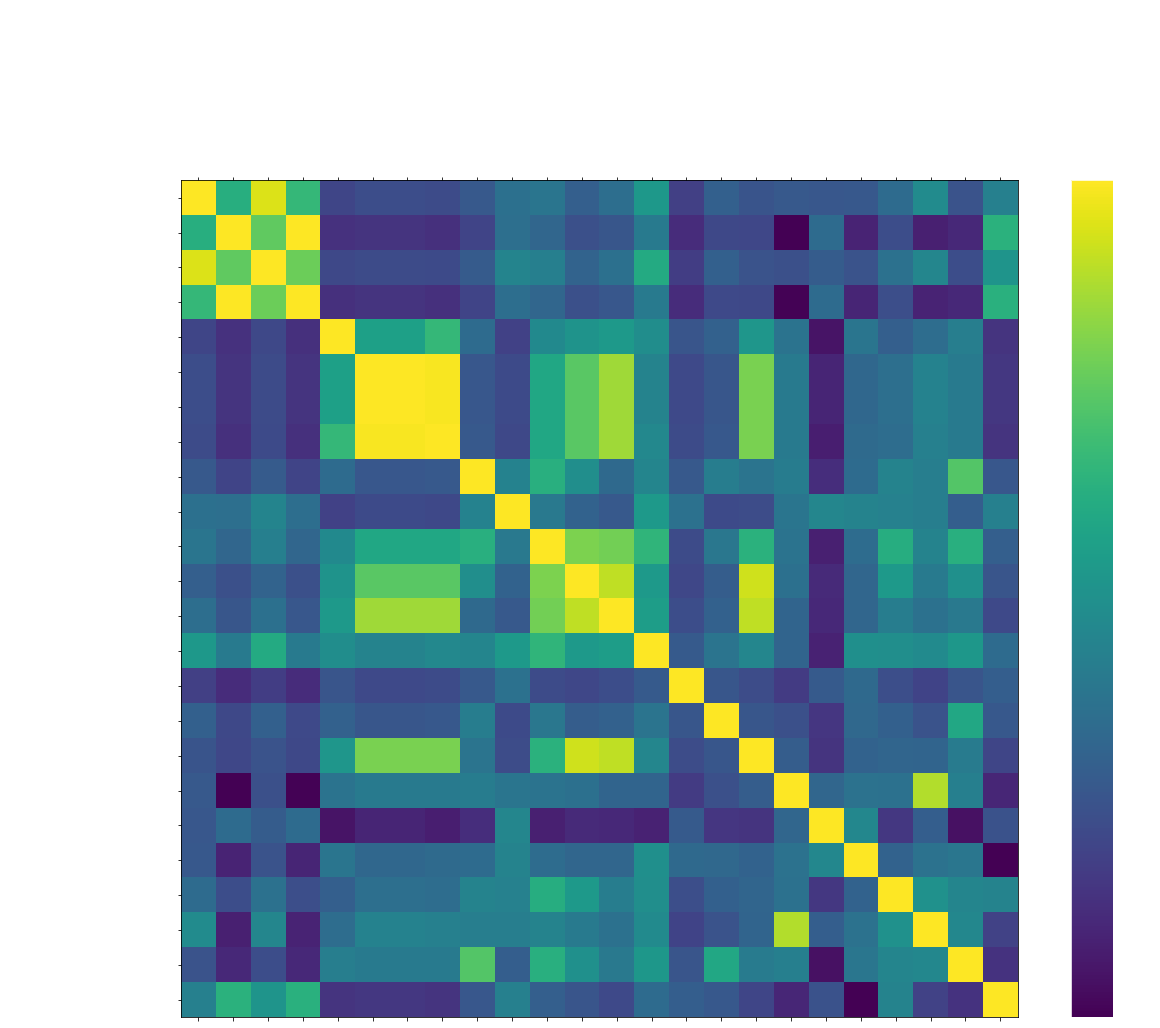

In [159]:
import matplotlib.pyplot as plt
import pandas as pd

fg_color = 'white'

df = X_train
df["label"] = np.array(y_train[:len(X_train)])
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90, color = fg_color)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14, color = fg_color)

cb = plt.colorbar()
cb.set_label('', color=fg_color)
cb.ax.yaxis.set_tick_params(color=fg_color)
cb.outline.set_edgecolor(fg_color)

plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)
 
cb.ax.tick_params(labelsize=14)